In [134]:
!pip install nltk
!pip install textblob
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from textblob import TextBlob
from textblob import  Word
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np
import re
import string
import warnings
warnings.filterwarnings('ignore') #olabilecek hatalari engellemek icin

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emin_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emin_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emin_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Veri setinin çekilmesi

In [2]:
df=pd.read_excel(r'C:\Users\emin_\OneDrive\Masaüstü\deneme\veriler.xlsx')
df

,HABERLER,ETIKET
0,TÜİK verilerine göre sanayi ciro endeksi Ağust...,Ekonomi
1,Piyasa güne eksi rezervde başladı,Ekonomi
2,"Citigroup, Deutsche Bank ve HSBC Libor manipül...",Ekonomi
3,Gelişen piyasa yatırımcılarını en fazla 'Fed' ...,Ekonomi
4,Bitcoin fiyatında yükseliş hız kesmiyor,Ekonomi
...,...,...
4195,Osmaniye'nin Kadirli ilçesinde caddede yürürke...,Yaşam
4196,İhraç edilen ya da görevden el çektirilen öğre...,Yaşam
4197,"Konak ilçesindeki operasyonda 55 gram esrar, 5...",Yaşam
4198,Siirt ve Manisa'da düzenlenen operasyonda göza...,Yaşam


# Veri setindeki her bir kategorideki veri sayısı

In [3]:
categories = df.groupby('ETIKET')
print("Total Categories:", categories.ngroups)
ıstatıstık=pd.DataFrame(categories.size())
ıstatıstık

Total Categories: 7


,0
ETIKET,
Ekonomi,600
Magazin,600
Sağlık,600
Siyaset,600
Spor,600
Teknoloji,600
Yaşam,600


# Veri setinde haber başlıklarına veri ön işleme yapabilmek için haber başlıklarını seçtik

In [4]:
df1=pd.DataFrame(df['HABERLER'])
df1

,HABERLER
0,TÜİK verilerine göre sanayi ciro endeksi Ağust...
1,Piyasa güne eksi rezervde başladı
2,"Citigroup, Deutsche Bank ve HSBC Libor manipül..."
3,Gelişen piyasa yatırımcılarını en fazla 'Fed' ...
4,Bitcoin fiyatında yükseliş hız kesmiyor
...,...
4195,Osmaniye'nin Kadirli ilçesinde caddede yürürke...
4196,İhraç edilen ya da görevden el çektirilen öğre...
4197,"Konak ilçesindeki operasyonda 55 gram esrar, 5..."
4198,Siirt ve Manisa'da düzenlenen operasyonda göza...


# Veri setini test ve train olarak ileride ayırabilmek için haberlerin etiketlerini seçtik

In [5]:
df2=pd.DataFrame(df['ETIKET'])
df2

,ETIKET
0,Ekonomi
1,Ekonomi
2,Ekonomi
3,Ekonomi
4,Ekonomi
...,...
4195,Yaşam
4196,Yaşam
4197,Yaşam
4198,Yaşam


# Veri ön işleme basamakaları sırasıyla şunları yapıldı:
1.Noktalama isaretlerinin silinmesi 
2.Sayıların silinmesi
3.Stopwordslerin silinmesi
4.Az geçen kelimelerin frekans hesabı ve seçilen kelimelerin silinmesi
5.Kelime köklerinin bulunması 
6.Büyük harfleirn küçük harfe çevrilmesi

In [6]:
#noktalama isaretlerini sildi
df1['HABERLER']=df1['HABERLER'].str.replace("[^\w\s]","")

#sayiari sildi
df1['HABERLER']=df1['HABERLER'].str.replace("\d","")

#stopwords leri sildi (ama,acaba,gibi...)
from nltk.corpus import stopwords
sw=stopwords.words("turkish")
df1['HABERLER']=df1['HABERLER'].apply(lambda x:" " .join(x for x in str(x).split() if x not in sw))

#az gecen kelimelerin silinmesi
#önce kelime frekanslarını hesapladık(burdda bütün kelimlerin frekanslarını hesapladıl)
sil=pd.Series(" ".join(df1["HABERLER"]).split()).value_counts()
sil1=pd.DataFrame(sil)
sil1.columns= ['frekans']
#sil1

#buradaydsa deneme datasinda calisitigimiz icin son 3 tanesini sectik ve onları silmesini istedik
sil=pd.Series(" ".join(df1["HABERLER"]).split()).value_counts()[-10:]
sil1=pd.DataFrame(sil)
sil1.columns= ['frekans']
#sil1

#sectigimiz kelimeleri sildi
df1['HABERLER']=df1['HABERLER'].apply(lambda x:" " .join(x for x in str(x).split() if x not in sil))

df1



,HABERLER
0,TÜİK verilerine göre sanayi ciro endeksi Ağust...
1,Piyasa güne eksi rezervde başladı
2,Citigroup Deutsche Bank HSBC Libor manipülasyo...
3,Gelişen piyasa yatırımcılarını fazla Fed ilgil...
4,Bitcoin fiyatında yükseliş hız kesmiyor
...,...
4195,Osmaniyenin Kadirli ilçesinde caddede yürürken...
4196,İhraç edilen görevden el çektirilen öğretmenle...
4197,Konak ilçesindeki operasyonda gram esrar uyuşt...
4198,Siirt Manisada düzenlenen operasyonda gözaltın...


In [7]:
#Kok bulma (lemmatization)
import warnings
warnings.filterwarnings('ignore') #olabilecek hataları engellemek icin
import zeyrek
analyzer = zeyrek.MorphAnalyzer()
all_stem_lists=[]
for i in df1.index:
        #print(df.loc[i,'HABERLER'].split())
        output_stems = []
        word_group=df1.loc[i,'HABERLER'].split()
       
        for word in word_group:
            #print(word)
            lem = analyzer.lemmatize(word)
            lem_1=lem[0][1][0]
            output_stems.append(lem_1)
        all_stem_lists.append(output_stems)
            
print(all_stem_lists)

[['Tüik', 'veri', 'görmek', 'sanayi', 'ciro', 'endeks', 'ağustos', 'ayın', 'bir', 'önce', 'yılmak', 'aynı', 'ayın', 'görmek', 'artmak'], ['piyasa', 'gün', 'eksi', 'rezerv', 'başlamak'], ['Citigroup', 'Deutsche', 'bank', 'Hsbc', 'Libor', 'manipülâsyon', 'dava', 'milyon', 'do', 'ödemek', 'kabul', 'etmek'], ['gelişmek', 'piyasa', 'yatırım', 'faz', 'Fed', 'İlgi'], ['Bitcoin', 'Fiyatı', 'yükselmek', 'hız', 'kesmek'], ['petrol', 'varil', 'do', 'işlem', 'görmek'], ['Imf', 'başka', 'Christ', 'Lagarde', 'artmak', 'Global', 'risk', 'uyarmak'], ['Tüpraş', 'yılmak', 'vade', 'milyon', 'do', 'borç'], ['Çin', 'ihracat', 'diren', 'Korur', 'ithalat', 'hızlanmak'], ['Fedin', 'aralıkta', 'faiz', 'artırmak', 'em', 'değil'], ['Tmsf', 'hazine', 'milyon', 'do', 'ödemek'], ['banka', 'düzenlemek', 'denetlemek', 'kuru', 'Merrill', 'Lynch', 'yatır', 'bank', 'Aş', 'his', 'devrî', 'Turkcell', 'özel', 'finansman', 'aşmak', 'unvan', 'bir', 'finansman', 'şirket', 'kurmak', 'iz', 'Verdi'], ['Imf', 'başkan', 'Sanal', '

In [8]:
output_stems = []
for i in df1.index:
        #print(df.loc[i,'HABERLER'].split())
        
        row_joined=" ".join(all_stem_lists[i])
        output_stems.append(row_joined)
            
print(output_stems)

['Tüik veri görmek sanayi ciro endeks ağustos ayın bir önce yılmak aynı ayın görmek artmak', 'piyasa gün eksi rezerv başlamak', 'Citigroup Deutsche bank Hsbc Libor manipülâsyon dava milyon do ödemek kabul etmek', 'gelişmek piyasa yatırım faz Fed İlgi', 'Bitcoin Fiyatı yükselmek hız kesmek', 'petrol varil do işlem görmek', 'Imf başka Christ Lagarde artmak Global risk uyarmak', 'Tüpraş yılmak vade milyon do borç', 'Çin ihracat diren Korur ithalat hızlanmak', 'Fedin aralıkta faiz artırmak em değil', 'Tmsf hazine milyon do ödemek', 'banka düzenlemek denetlemek kuru Merrill Lynch yatır bank Aş his devrî Turkcell özel finansman aşmak unvan bir finansman şirket kurmak iz Verdi', 'Imf başkan Sanal para uyarı', 'Avrupa borsa karışık bir seyir iz', 'Asya borsa hafta son işlem gün alışmak ağırlık bir seyir iz güney Kore Kospi endeks negatif ayrışmak', 'dünya Büyük petrol ithalat Çin ülke petrol alım yuan kabul etmek teşvik etmek çeşit teknik kul eğmek başarı Olur do dünya rezerv para bir olmak ku

In [9]:
df1=pd.DataFrame(output_stems,columns=['HABERLER'])
df1

,HABERLER
0,Tüik veri görmek sanayi ciro endeks ağustos ay...
1,piyasa gün eksi rezerv başlamak
2,Citigroup Deutsche bank Hsbc Libor manipülâsyo...
3,gelişmek piyasa yatırım faz Fed İlgi
4,Bitcoin Fiyatı yükselmek hız kesmek
...,...
4195,Osmaniye kadir ilçe cadde yürümek tip hoş gitm...
4196,ihraç edi görev el çekmek öğretmen yönelik ope...
4197,konak ilçe operasyon gram esrar uyuşmak hap ru...
4198,Siirt Manisa düzen operasyon gözaltı alınan es...


In [10]:
#haber basliklarindaki buyuk harfleri kucuk yapti(normalde en basta yapilmasi gerekir fakat kok bulurken buyuk harf olarak aldıgından kok aldıktan sonra kucuge cevirdik)
df1['HABERLER']=df1['HABERLER'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df1

,HABERLER
0,tüik veri görmek sanayi ciro endeks ağustos ay...
1,piyasa gün eksi rezerv başlamak
2,citigroup deutsche bank hsbc libor manipülâsyo...
3,gelişmek piyasa yatırım faz fed i̇lgi
4,bitcoin fiyatı yükselmek hız kesmek
...,...
4195,osmaniye kadir ilçe cadde yürümek tip hoş gitm...
4196,ihraç edi görev el çekmek öğretmen yönelik ope...
4197,konak ilçe operasyon gram esrar uyuşmak hap ru...
4198,siirt manisa düzen operasyon gözaltı alınan es...


In [11]:
#parçalama (Tokenization) (bu normalde en başta yapılıp veri ön işleme bu parçalanmaya göre yapılırdı fakat biz zaten split() fonksiyonu ile bunu halletik gerek duymadık)
#df1['HABERLER']=df1['HABERLER'].apply(lambda x: TextBlob(x).words)
#df1

In [12]:
#Text Visualization (metin görselleştirme)
tf = df1["HABERLER"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf

,words,tf
0,görmek,158.0
1,ayın,63.0
2,tüik,3.0
3,veri,55.0
4,sanayi,11.0
...,...,...
7881,birol,1.0
7882,bozkan,1.0
7883,özgür,1.0
7884,sürüklenen,1.0


In [13]:
#biribirnden farklı kaç kelime var
tf["words"].nunique()

7886

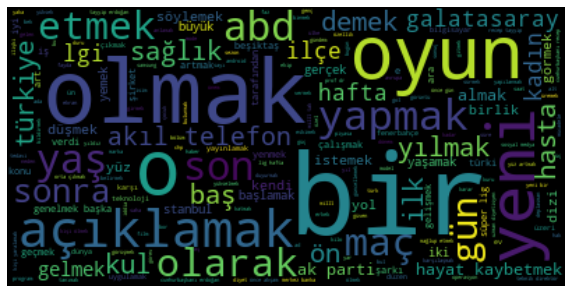

In [14]:
text = " ".join(i for i in df1.HABERLER)
wordcloud = WordCloud().generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
wordcloud.to_file("kelime bulutu.jpg")

# Feature Engineering

# Bag Of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
BoW_Vector = CountVectorizer(min_df = 0., max_df = 1.) #kelimeleri sayi vektörüne dönüştürmek için kullanılır
BoW_Matrix = BoW_Vector.fit_transform(df1['HABERLER']) #CountVectorizer sinifini dataya fit ve tranform ettik
print(BoW_Matrix)

  (0, 6654)	1
  (0, 6845)	1
  (0, 2723)	2
  (0, 5575)	1
  (0, 1395)	1
  (0, 2023)	1
  (0, 630)	1
  (0, 573)	2
  (0, 996)	1
  (0, 7598)	1
  (0, 7306)	1
  (0, 555)	1
  (0, 414)	1
  (1, 5203)	1
  (1, 2787)	1
  (1, 1962)	1
  (1, 5417)	1
  (1, 817)	1
  (2, 1396)	1
  (2, 1610)	1
  (2, 711)	1
  (2, 3063)	1
  (2, 4134)	1
  (2, 4285)	1
  (2, 1505)	1
  :	:
  (4197, 6216)	1
  (4197, 6630)	1
  (4197, 3168)	1
  (4197, 1979)	1
  (4197, 4964)	1
  (4197, 2875)	1
  (4197, 2572)	1
  (4197, 6768)	1
  (4197, 3824)	1
  (4197, 2135)	1
  (4197, 5475)	1
  (4198, 1849)	1
  (4198, 2121)	1
  (4198, 6630)	1
  (4198, 5637)	1
  (4198, 4964)	1
  (4198, 2753)	1
  (4198, 244)	1
  (4198, 4286)	1
  (4198, 5849)	1
  (4199, 5847)	1
  (4199, 4964)	1
  (4199, 2753)	1
  (4199, 1573)	1
  (4199, 3660)	1


In [18]:
features=BoW_Vector.get_feature_names() # BoW_Vector içerisindeki tüm öznitelikleri al

In [19]:
BoW_Matrix = BoW_Matrix.toarray() #Oluşan diziyi matrise dönüştürmek için toarray() fonksiyonu kullanılır.
print(BoW_Matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
BoW_df = pd.DataFrame(BoW_Matrix, columns = features)
BoW_df

,ab,abazi,abd,abdulfettah,abdulhamit,abdulkadir,abdullah,abid,abis,abla,...,şuur,şçil,şöhret,şöyle,şûra,şükür,şüphe,şık,şıkel,şırnak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF İle Vektörleştirme

# word level

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
Tfidf_Vector = TfidfVectorizer(min_df = 0., max_df = 1., use_idf = True)
Tfidf_Matrix = Tfidf_Vector.fit_transform(df1["HABERLER"])
print(Tfidf_Matrix)

  (0, 414)	0.19218639803585708
  (0, 555)	0.24837033685062926
  (0, 7306)	0.18018371764254984
  (0, 7598)	0.1955210724393171
  (0, 996)	0.11931973855543747
  (0, 573)	0.44264138879897386
  (0, 630)	0.30035382595854193
  (0, 2023)	0.23661885251493958
  (0, 1395)	0.3053044713101524
  (0, 5575)	0.29592532278592526
  (0, 2723)	0.3619892954264005
  (0, 6845)	0.22504276237366203
  (0, 6654)	0.3344387676737823
  (1, 817)	0.3848905102882555
  (1, 5417)	0.5625941292041413
  (1, 1962)	0.539944875380483
  (1, 2787)	0.2925184821347104
  (1, 5203)	0.3977934263346244
  (2, 2157)	0.15071972975726025
  (2, 3388)	0.24906107455594012
  (2, 7578)	0.27061152125288673
  (2, 1712)	0.19724756152714643
  (2, 4523)	0.19993455125804285
  (2, 1505)	0.28604360888875935
  (2, 4285)	0.3395557503601077
  :	:
  (4197, 3824)	0.3576539753300146
  (4197, 6768)	0.26744551652745735
  (4197, 2572)	0.279925480912528
  (4197, 2875)	0.32089726320311884
  (4197, 4964)	0.20100838889095377
  (4197, 1979)	0.22916650439160577
  (4

In [23]:
Tfidf_Matrix = Tfidf_Matrix.toarray()
print(np.round(Tfidf_Matrix, 3))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
features = Tfidf_Vector.get_feature_names()

In [25]:
Tfidf_df = pd.DataFrame(np.round(Tfidf_Matrix, 3), columns = features)
Tfidf_df

,ab,abazi,abd,abdulfettah,abdulhamit,abdulkadir,abdullah,abid,abis,abla,...,şuur,şçil,şöhret,şöyle,şûra,şükür,şüphe,şık,şıkel,şırnak
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
4196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.226,0.0,0.0,0.0
4197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
4198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


# n-gram

In [26]:
#ngram ile TF-IDF (kelimelerin birbirleriyle ifade edilis tarzlarini ifade eder)
Tfidf_Vector_Ngram = TfidfVectorizer(ngram_range=(2, 3))
Tfidf_Matrix_Ngram=Tfidf_Vector_Ngram .fit_transform(df1["HABERLER"])
print(Tfidf_Matrix_Ngram)

  (0, 5258)	0.1990194474455007
  (0, 5093)	0.18228703859583034
  (0, 68748)	0.17856587767696075
  (0, 71648)	0.18228703859583034
  (0, 10772)	0.18228703859583034
  (0, 5231)	0.1990194474455007
  (0, 5869)	0.2088072791692927
  (0, 19915)	0.2088072791692927
  (0, 14080)	0.2088072791692927
  (0, 51922)	0.1990194474455007
  (0, 26577)	0.2088072791692927
  (0, 63204)	0.2088072791692927
  (0, 61270)	0.1990194474455007
  (0, 26458)	0.1990194474455007
  (0, 5257)	0.18228703859583034
  (0, 5092)	0.17856587767696075
  (0, 68747)	0.16016799724230918
  (0, 71647)	0.18228703859583034
  (0, 10768)	0.16995582896610112
  (0, 5230)	0.1990194474455007
  (0, 5868)	0.17856587767696075
  (0, 19914)	0.2088072791692927
  (0, 14079)	0.1920748703196223
  (0, 51921)	0.1990194474455007
  (0, 26576)	0.2088072791692927
  :	:
  (4197, 25999)	0.2063290175756605
  (4197, 37682)	0.2063290175756605
  (4197, 19646)	0.1614877883512489
  (4198, 20757)	0.2719801738764647
  (4198, 2122)	0.2719801738764647
  (4198, 26904)	0.

In [27]:
Tfidf_Matrix_Ngram = Tfidf_Matrix_Ngram.toarray()
print(np.round(Tfidf_Matrix_Ngram, 3))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
features = Tfidf_Vector_Ngram.get_feature_names()

In [29]:
Tfidf_df = pd.DataFrame(np.round(Tfidf_Matrix_Ngram, 3), columns = features)
Tfidf_df

,ab bakan,ab bakan baş,ab bakan çelik,ab bakan ömer,ab bakanlık,ab bakanlık gıda,ab bütçe,ab bütçe türki,ab komisyon,ab komisyon başka,...,şırnak cehennem,şırnak cehennem dere,şırnak cizre,şırnak cizre ilçe,şırnak kır,şırnak kır saldırı,şırnak silopi,şırnak silopi ilçe,şırnak vali,şırnak vali bestlerdereler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Char level

In [30]:
#characters level TF-IDF
Tfidf_Vector_Char = TfidfVectorizer(analyzer="char", ngram_range=(2, 3))
Tfidf_Matrix_Char=Tfidf_Vector_Char .fit_transform(df1['HABERLER'])
print(Tfidf_Matrix_Char)

  (0, 6193)	0.06817208755811699
  (0, 5595)	0.08677687928177727
  (0, 870)	0.06149963918728006
  (0, 18)	0.05688145214139779
  (0, 4339)	0.06686792018187995
  (0, 8184)	0.07858916078333286
  (0, 4676)	0.07858916078333286
  (0, 7166)	0.11337509204583823
  (0, 981)	0.10308525234209182
  (0, 3348)	0.10605662344888488
  (0, 710)	0.030088779386797045
  (0, 4074)	0.05464658455471774
  (0, 3860)	0.04893978706304001
  (0, 8265)	0.07621743483995806
  (0, 7262)	0.06518933734679375
  (0, 454)	0.06595792695237078
  (0, 1768)	0.07818942643272996
  (0, 1340)	0.07858916078333286
  (0, 4399)	0.07286862475889236
  (0, 7781)	0.08756656089619039
  (0, 490)	0.06632741810647291
  (0, 5335)	0.09271362258272596
  (0, 3095)	0.04868310691610978
  (0, 1152)	0.04939740972306972
  (0, 35)	0.04436354337858333
  :	:
  (4199, 202)	0.05108157758583782
  (4199, 4856)	0.06606126913739996
  (4199, 7167)	0.08267698144221802
  (4199, 5979)	0.10927653453984132
  (4199, 4479)	0.08699835998944583
  (4199, 3803)	0.06696289670

In [31]:
Tfidf_Matrix_Char = Tfidf_Matrix_Char.toarray()
print(np.round(Tfidf_Matrix_Char, 3))

[[0.146 0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.037 0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [32]:
features = Tfidf_Vector_Char.get_feature_names()

In [33]:
Tfidf_df = pd.DataFrame(np.round(Tfidf_Matrix_Char, 3), columns = features)
Tfidf_df

,a,a,ab,ac,ad,ae,af,ag,ah,ai,...,̇z,̇ze,̇zl,̇zm,̇zn,̇ç,̇çi,̇ş,̇şb,̇şç
0,0.146,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.026,0.0,0.0,0.0,0.068,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4196,0.054,0.0,0.0,0.0,0.070,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4198,0.037,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# VERİNİN TRAİN VE TEST AYRIMI

In [34]:
from sklearn import model_selection
X=df1["HABERLER"]
y=df2["ETIKET"]
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size = 0.25, random_state = 42)

# SVM (SUPPORT VECTOR MACHINE-DESTEK VEKTÖR MAKİNESİ) ve YSA(YAPAY SİNİR AĞLARI)

# BAG OF WORDS ' UN SVM İLE TRAİN EDİLMESİ 

In [35]:
bow_vector= CountVectorizer(min_df = 0., max_df = 1.)  

In [36]:
x_train_bow_vector=bow_vector.fit_transform(X_train)
x_test_bow_vector=bow_vector.transform(X_test)

In [37]:
from sklearn.svm import SVC
svm_model_bgw=SVC(kernel ='rbf',gamma='scale').fit(x_train_bow_vector,y_train)
#kernel ='linear', gamma='auto'

In [38]:
accuracy=svm_model_bgw.score(x_test_bow_vector, y_test) 
accuracy

0.9657142857142857

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=svm_model_bgw.predict(x_test_bow_vector)
y_pred

array(['Sağlık', 'Siyaset', 'Sağlık', ..., 'Yaşam', 'Yaşam', 'Ekonomi'],
      dtype=object)

<AxesSubplot:title={'center':'Bag Of Words TF-IDF SVM Confusion Matrix'}>

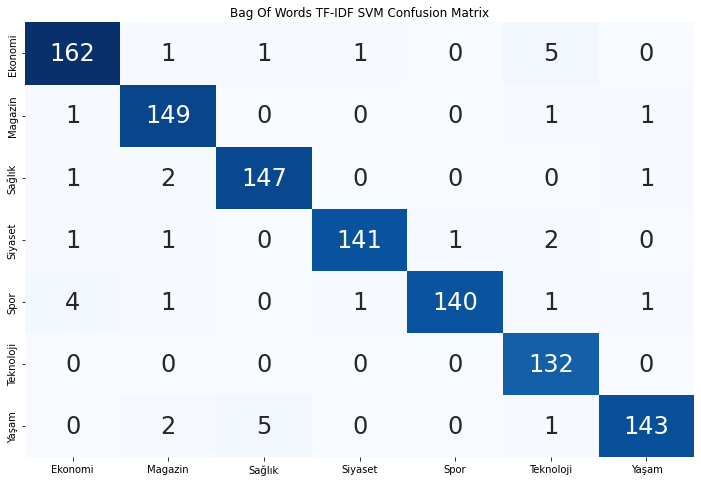

In [40]:
cm_svm = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("Bag Of Words TF-IDF SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       0.96      0.95      0.96       170
     Magazin       0.96      0.98      0.97       152
      Sağlık       0.96      0.97      0.97       151
     Siyaset       0.99      0.97      0.98       146
        Spor       0.99      0.95      0.97       148
   Teknoloji       0.93      1.00      0.96       132
       Yaşam       0.98      0.95      0.96       151

    accuracy                           0.97      1050
   macro avg       0.97      0.97      0.97      1050
weighted avg       0.97      0.97      0.97      1050



# BAG OF WORDS YAPAY SİNİR AĞLARI

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train_bow_vector)
X_train_scaled = scaler.transform(x_train_bow_vector)
X_test_scaled = scaler.transform(x_test_bow_vector)

In [43]:
from sklearn.neural_network import  MLPClassifier
mlpc_bow = MLPClassifier(hidden_layer_sizes=(100,100,100)).fit(X_train_scaled, y_train.values.ravel())    

In [44]:
#from sklearn.model_selection import GridSearchCV
#mlp_params={'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,100,100)],
  #  'activation': ['logistic', 'relu'],
   # 'alpha': [0.1,0.001,0.002, 0.005]}

In [45]:
#mlp_cv_model=GridSearchCV(mlpc_bow ,mlp_params)

In [46]:
#mlp_cv_model.fit(X_train_scaled,y_train)

In [47]:
#mlp_cv_model.best_params_  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50)}

In [48]:
y_pred= mlpc_bow.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9580952380952381

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       0.95      0.96      0.96       170
     Magazin       0.97      0.95      0.96       152
      Sağlık       0.97      0.99      0.98       151
     Siyaset       0.95      0.95      0.95       146
        Spor       0.97      0.96      0.97       148
   Teknoloji       0.92      0.98      0.95       132
       Yaşam       0.98      0.93      0.95       151

    accuracy                           0.96      1050
   macro avg       0.96      0.96      0.96      1050
weighted avg       0.96      0.96      0.96      1050



<AxesSubplot:title={'center':'Bag Of Words TF-IDF MLP'}>

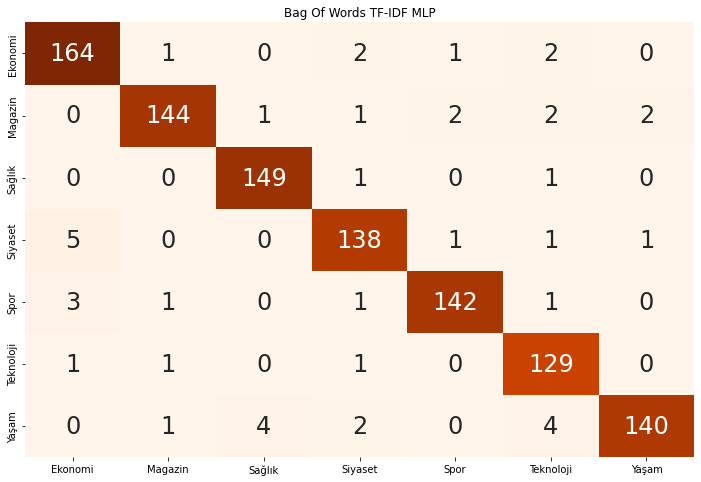

In [50]:
cm_ysa = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("Bag Of Words TF-IDF MLP")
sns.heatmap(cm_ysa,annot=True,cmap='Oranges',fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)      

# WORD LEVEL'IN SVM İLE TEST EDİLMESİ

In [51]:
tf_idf_wordlevel_vectorizer= TfidfVectorizer(min_df = 0., max_df = 1., use_idf = True)

In [52]:
x_train_tf_idf_wordlevel=tf_idf_wordlevel_vectorizer.fit_transform(X_train)
x_test_tf_idf_wordlevel=tf_idf_wordlevel_vectorizer.transform(X_test)

In [53]:
from sklearn.svm import SVC
svm_model_word=SVC(kernel ='rbf').fit(x_train_tf_idf_wordlevel,y_train)

In [54]:
accuracy=svm_model_word.score(x_test_tf_idf_wordlevel, y_test)
accuracy

0.98

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=svm_model_word.predict(x_test_tf_idf_wordlevel)
y_pred

array(['Sağlık', 'Siyaset', 'Sağlık', ..., 'Yaşam', 'Yaşam', 'Ekonomi'],
      dtype=object)

<AxesSubplot:title={'center':'Word Level TF-IDF SVM Confusion Matrix'}>

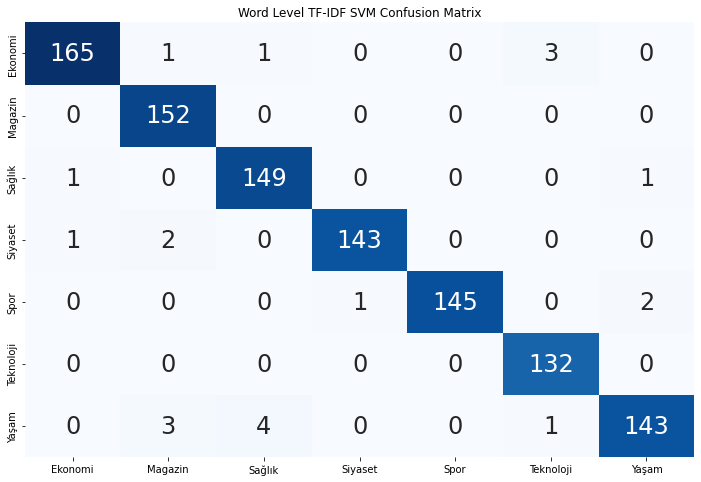

In [56]:
import seaborn as sns
cm_svm = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("Word Level TF-IDF SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       0.99      0.97      0.98       170
     Magazin       0.96      1.00      0.98       152
      Sağlık       0.97      0.99      0.98       151
     Siyaset       0.99      0.98      0.99       146
        Spor       1.00      0.98      0.99       148
   Teknoloji       0.97      1.00      0.99       132
       Yaşam       0.98      0.95      0.96       151

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050



# WORD LEVEL YAPAY SİNİR AĞLARI

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train_tf_idf_wordlevel)
X_train_scaled = scaler.transform(x_train_tf_idf_wordlevel)
X_test_scaled = scaler.transform(x_test_tf_idf_wordlevel)

In [59]:
from sklearn.neural_network import  MLPClassifier
mlpc_word = MLPClassifier(hidden_layer_sizes=(100,100,100)).fit(X_train_scaled, y_train.values.ravel())

In [60]:
y_pred= mlpc_word.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9476190476190476

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       0.97      0.91      0.94       170
     Magazin       0.95      0.97      0.96       152
      Sağlık       0.90      0.97      0.93       151
     Siyaset       0.98      0.94      0.96       146
        Spor       0.97      0.96      0.97       148
   Teknoloji       0.93      0.95      0.94       132
       Yaşam       0.95      0.93      0.94       151

    accuracy                           0.95      1050
   macro avg       0.95      0.95      0.95      1050
weighted avg       0.95      0.95      0.95      1050



<AxesSubplot:title={'center':'Bag Of Words TF-IDF MLP'}>

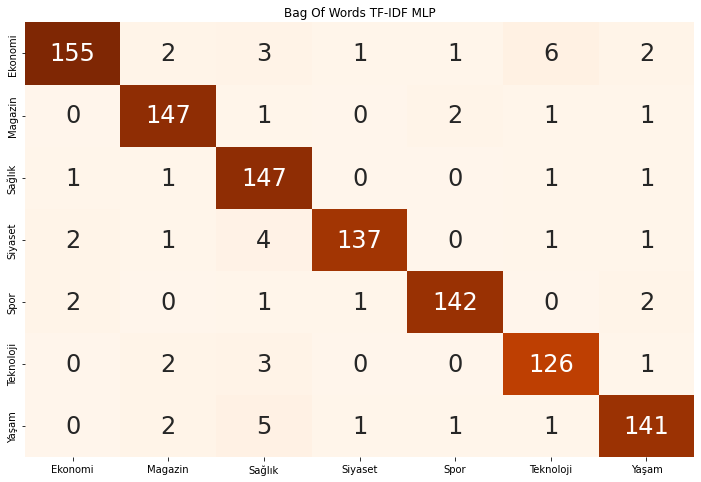

In [62]:
cm_ysa = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("Bag Of Words TF-IDF MLP")
sns.heatmap(cm_ysa,annot=True,cmap='Oranges',fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)   

# N GRAM'IN SVM İLE TEST EDİLMESİ

In [63]:
tf_idf_ngram_vectorizer=TfidfVectorizer(ngram_range=(2, 3))

In [64]:
x_train_tf_idf_ngram=tf_idf_ngram_vectorizer.fit_transform(X_train)
x_test_tf_idf_ngram=tf_idf_ngram_vectorizer.transform(X_test)

In [65]:
from sklearn.svm import SVC
svm_model_ngram=SVC(kernel ='rbf').fit(x_train_tf_idf_ngram,y_train)
#kernel ='rbf', gamma=0.1 , C = 10

In [66]:
accuracy=svm_model_ngram.score(x_test_tf_idf_ngram, y_test)
accuracy

0.8285714285714286

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=svm_model_ngram.predict(x_test_tf_idf_ngram)
y_pred

array(['Sağlık', 'Siyaset', 'Sağlık', ..., 'Yaşam', 'Yaşam', 'Ekonomi'],
      dtype=object)

<AxesSubplot:title={'center':'N-Gram TF-IDF SVM Confusion Matrix'}>

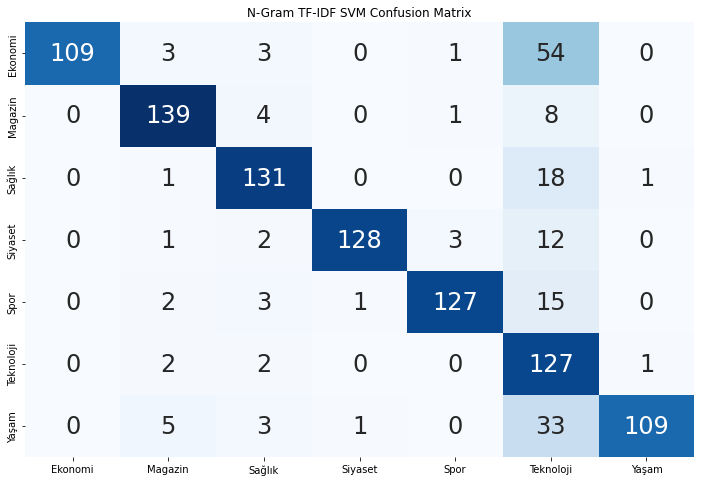

In [68]:
import seaborn as sns
cm_svm = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("N-Gram TF-IDF SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       1.00      0.64      0.78       170
     Magazin       0.91      0.91      0.91       152
      Sağlık       0.89      0.87      0.88       151
     Siyaset       0.98      0.88      0.93       146
        Spor       0.96      0.86      0.91       148
   Teknoloji       0.48      0.96      0.64       132
       Yaşam       0.98      0.72      0.83       151

    accuracy                           0.83      1050
   macro avg       0.89      0.83      0.84      1050
weighted avg       0.89      0.83      0.84      1050



# N-GRAM YAPAY SİNİR AĞLARI

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train_tf_idf_ngram)
X_train_scaled = scaler.transform(x_train_tf_idf_ngram)
X_test_scaled = scaler.transform(x_test_tf_idf_ngram)

In [71]:
from sklearn.neural_network import  MLPClassifier
mlpc_ngram = MLPClassifier(hidden_layer_sizes=(100,100,100)).fit(X_train_scaled, y_train.values.ravel())

In [72]:
y_pred= mlpc_ngram.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8723809523809524

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       0.71      0.89      0.79       170
     Magazin       0.84      0.93      0.88       152
      Sağlık       0.93      0.87      0.90       151
     Siyaset       0.93      0.91      0.92       146
        Spor       0.94      0.89      0.91       148
   Teknoloji       0.90      0.81      0.85       132
       Yaşam       0.95      0.80      0.87       151

    accuracy                           0.87      1050
   macro avg       0.89      0.87      0.88      1050
weighted avg       0.88      0.87      0.87      1050



<AxesSubplot:title={'center':'Bag Of Words TF-IDF MLP'}>

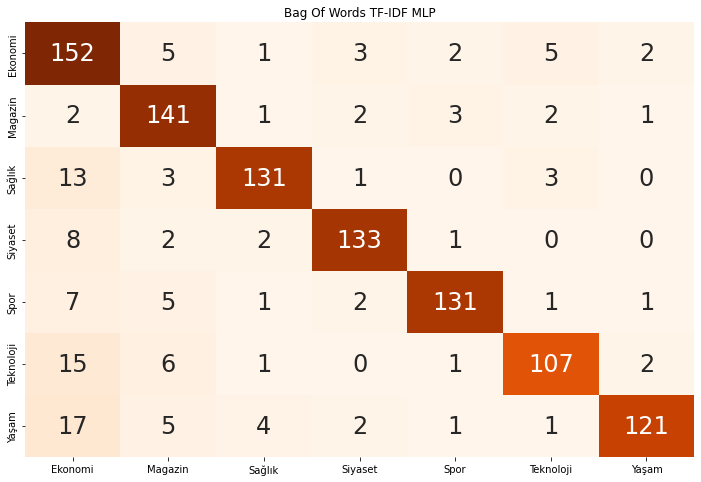

In [74]:
cm_ysa = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("Bag Of Words TF-IDF MLP")
sns.heatmap(cm_ysa,annot=True,cmap='Oranges',fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)   

# CHAR LEVEL'IN SVM İLE TEST EDİLMESİ

In [75]:
tf_idf_charlevel_vectorizer= TfidfVectorizer(analyzer="char", ngram_range=(2, 3))

In [76]:
x_train_tf_idf_charlevel=tf_idf_charlevel_vectorizer.fit_transform(X_train)
x_test_tf_idf_charlevel=tf_idf_charlevel_vectorizer.transform(X_test)

In [77]:
from sklearn.svm import SVC
svm_model_char=SVC(kernel ='rbf').fit(x_train_tf_idf_charlevel,y_train)

In [78]:
accuracy=svm_model_char.score(x_test_tf_idf_charlevel, y_test)
accuracy

0.960952380952381

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=svm_model_char.predict(x_test_tf_idf_charlevel)
y_pred

array(['Sağlık', 'Siyaset', 'Sağlık', ..., 'Yaşam', 'Yaşam', 'Ekonomi'],
      dtype=object)

<AxesSubplot:title={'center':'Char Level TF-IDF SVM Confusion Matrix'}>

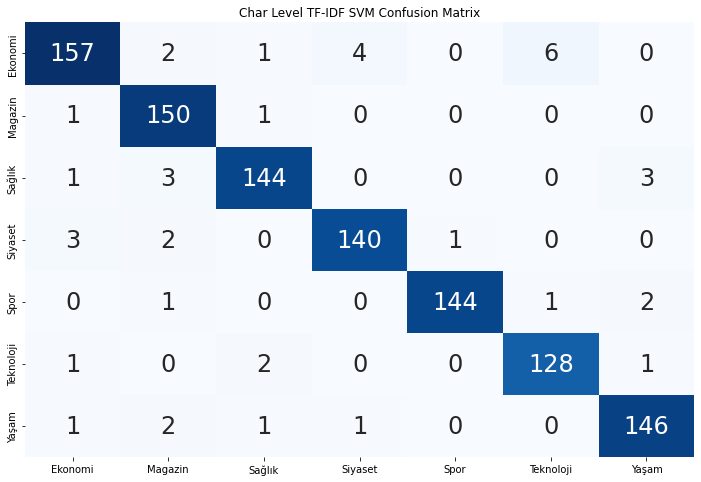

In [80]:
import seaborn as sns
cm_svm = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("Char Level TF-IDF SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       0.96      0.92      0.94       170
     Magazin       0.94      0.99      0.96       152
      Sağlık       0.97      0.95      0.96       151
     Siyaset       0.97      0.96      0.96       146
        Spor       0.99      0.97      0.98       148
   Teknoloji       0.95      0.97      0.96       132
       Yaşam       0.96      0.97      0.96       151

    accuracy                           0.96      1050
   macro avg       0.96      0.96      0.96      1050
weighted avg       0.96      0.96      0.96      1050



# CHAR LEVEL YAPAY SİNİR AĞLARI

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(x_train_tf_idf_charlevel)
X_train_scaled = scaler.transform(x_train_tf_idf_charlevel)
X_test_scaled = scaler.transform(x_test_tf_idf_charlevel)

In [83]:
from sklearn.neural_network import  MLPClassifier
mlpc_char = MLPClassifier(hidden_layer_sizes=(100,100,100)).fit(X_train_scaled, y_train.values.ravel())

In [84]:
y_pred= mlpc_char.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9495238095238095

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Ekonomi       0.97      0.92      0.95       170
     Magazin       0.96      0.99      0.97       152
      Sağlık       0.93      0.94      0.94       151
     Siyaset       0.95      0.97      0.96       146
        Spor       0.99      0.94      0.96       148
   Teknoloji       0.91      0.97      0.94       132
       Yaşam       0.93      0.93      0.93       151

    accuracy                           0.95      1050
   macro avg       0.95      0.95      0.95      1050
weighted avg       0.95      0.95      0.95      1050



<AxesSubplot:title={'center':'Bag Of Words TF-IDF MLP'}>

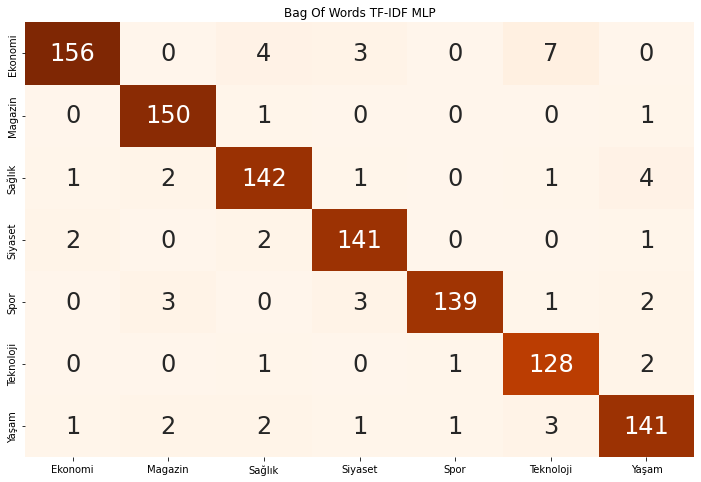

In [86]:
cm_ysa = confusion_matrix(y_test,y_pred)
labels = ["Ekonomi","Magazin","Sağlık","Siyaset","Spor","Teknoloji","Yaşam"]
plt.figure(figsize=(12,8))
plt.title("Bag Of Words TF-IDF MLP")
sns.heatmap(cm_ysa,annot=True,cmap='Oranges',fmt="d",cbar=False, annot_kws={"size": 24},xticklabels=labels, yticklabels=labels)   

# TEST ETME

In [87]:
yeni_haber=pd.read_excel(r'C:\Users\emin_\OneDrive\Masaüstü\deneme\test.xlsx')
yeni_haber

,HABERLER
0,Toplumda oldukça sık görülebilen kalp yetmezli...
1,"PSG'nin dünyaca ünlü yıldız futbolcusu Neymar,..."
2,Arzum Onan ve Mehmet Aslantuğ çiftinin bir sür...
3,"Yunanistan Dışişleri Bakanı Nikos Dendias, ""Tü..."
4,Alarko Gayrimenkul 1Ç23 Net Karı Geriledi: 48 ...
5,"Uzay sektöründeki en son yenilikler, teknoloji..."
6,Hatay'da korkunç kaza! İki otomobil çarpıştı: ...


In [88]:
#noktalama isaretlerini sildi
yeni_haber['HABERLER']=yeni_haber['HABERLER'].str.replace("[^\w\s]","")

#sayiari sildi
yeni_haber['HABERLER']=yeni_haber['HABERLER'].str.replace("\d","")

#stopwords leri sildi (ama,acaba,gibi...)
from nltk.corpus import stopwords
sw=stopwords.words("turkish")
yeni_haber['HABERLER']=yeni_haber['HABERLER'].apply(lambda x:" " .join(x for x in str(x).split() if x not in sw))


#az gecen kelimelerin silinmesi
#önce kelime frekanslarını hesapladık(burdda bütün kelimlerin frekanslarını hesapladıl)
sil=pd.Series(" ".join(yeni_haber["HABERLER"]).split()).value_counts()
sil1=pd.DataFrame(sil)
sil1.columns= ['frekans']
#sil1

#buradaydsa deneme datasinda calisitigimiz icin son 3 tanesini sectik ve onları silmesini istedik
sil=pd.Series(" ".join(yeni_haber["HABERLER"]).split()).value_counts()[-3:]
sil1=pd.DataFrame(sil)
sil1.columns= ['frekans']
#sil1

#sectigimiz kelimeleri sildi
yeni_haber['HABERLER']=yeni_haber['HABERLER'].apply(lambda x:" " .join(x for x in str(x).split() if x not in sil))

yeni_haber


,HABERLER
0,Toplumda oldukça sık görülebilen kalp yetmezli...
1,ünlü yıldız futbolcusu Neymar sakatlığı sebebi...
2,Arzum Onan Mehmet Aslantuğ çiftinin bir süredi...
3,Yunanistan Dışişleri Bakanı Nikos Dendias Türk...
4,Alarko Gayrimenkul Ç Net Karı Geriledi milyon TL
5,Uzay sektöründeki son yenilikler teknolojiler ...
6,Hatayda korkunç kaza İki otomobil çarpıştı kiş...


In [89]:
#Kok bulma (lemmatization)
import warnings
warnings.filterwarnings('ignore') #olabilecek hataları engellemek icin
import zeyrek
analyzer = zeyrek.MorphAnalyzer()
all_stem_lists=[]
for i in yeni_haber.index:
        #print(df.loc[i,'HABERLER'].split())
        output_stems = []
        word_group=yeni_haber.loc[i,'HABERLER'].split()
       
        for word in word_group:
            #print(word)
            lem = analyzer.lemmatize(word)
            lem_1=lem[0][1][0]
            output_stems.append(lem_1)
        all_stem_lists.append(output_stems)
            
print(all_stem_lists)

[['toplu', 'oldukça', 'sıkmak', 'görmek', 'kalp', 'yetmek', 'ölü', 'oran', 'birçok', 'hasta', 'hat', 'kanser', 'tür', 'bile', 'faz', 'geceleri', 'nefes', 'dar', 'uyku', 'uyanmak', 'efor', 'kapasite', 'kısıtlamak', 'çarpıntı', 'göğüs', 'Ağrı', 'öksürük', 'varmak', 'dikkatli', 'olmak'], ['ün', 'yıldız', 'futbol', 'Neymar', 'sakat', 'sebep', 'hafta', 'saha', 'uzak', 'kalmak'], ['arzu', 'onmak', 'Mehmet', 'Aslantuğ', 'çift', 'bir', 'süre', 'boşamak', 'magazin', 'kulis', 'konuşmak', 'çıkmak', 'boşamak', 'iddia', 'art', 'bir', 'süre', 'ses', 'olmak', 'arzu', 'onmak', 'Mehmet', 'Aslantuğ', 'cephe', 'net', 'bir', 'cevap', 'gelmek'], ['Yunanistan', 'dışiş', 'bakan', 'Nikos', 'Dendias', 'Türki', 'Yunanistan', 'ara', 'savaşmak', 'çıkmak', 'soru', 'yanıt', 'Verdi', 'Dendiastan', 'Türki', 'sorun', 'çözüm', 'iki', 'ülke', 'seçim', 'art', 'imza', 'atmak', 'hazır', 'olmak', 'mesaj', 'gelmek'], ['Alarko', 'gayrimenkul', 'Ç', 'net', 'kar', 'gerilemek', 'milyon', 'Tl'], ['Uzay', 'sektör', 'son', 'yenilik

In [90]:
output_stems = []
for i in yeni_haber.index:
        #print(df.loc[i,'HABERLER'].split())
        
        row_joined=" ".join(all_stem_lists[i])
        output_stems.append(row_joined)
            
print(output_stems)

['toplu oldukça sıkmak görmek kalp yetmek ölü oran birçok hasta hat kanser tür bile faz geceleri nefes dar uyku uyanmak efor kapasite kısıtlamak çarpıntı göğüs Ağrı öksürük varmak dikkatli olmak', 'ün yıldız futbol Neymar sakat sebep hafta saha uzak kalmak', 'arzu onmak Mehmet Aslantuğ çift bir süre boşamak magazin kulis konuşmak çıkmak boşamak iddia art bir süre ses olmak arzu onmak Mehmet Aslantuğ cephe net bir cevap gelmek', 'Yunanistan dışiş bakan Nikos Dendias Türki Yunanistan ara savaşmak çıkmak soru yanıt Verdi Dendiastan Türki sorun çözüm iki ülke seçim art imza atmak hazır olmak mesaj gelmek', 'Alarko gayrimenkul Ç net kar gerilemek milyon Tl', 'Uzay sektör son yenilik teknoloji ürün sergi Uzay teknoloji fuar Long Beachte düzen', 'Hatay korkunç kaz iki otomobil çarpmak kişi ölmek kişi']


In [91]:
yeni_haber=pd.DataFrame(output_stems,columns=['HABERLER'])
yeni_haber

,HABERLER
0,toplu oldukça sıkmak görmek kalp yetmek ölü or...
1,ün yıldız futbol Neymar sakat sebep hafta saha...
2,arzu onmak Mehmet Aslantuğ çift bir süre boşam...
3,Yunanistan dışiş bakan Nikos Dendias Türki Yun...
4,Alarko gayrimenkul Ç net kar gerilemek milyon Tl
5,Uzay sektör son yenilik teknoloji ürün sergi U...
6,Hatay korkunç kaz iki otomobil çarpmak kişi öl...


In [92]:
#haber basliklarindaki buyuk harfleri kucuk yapti(normalde en basta yapilmasi gerekir fakat kok bulurken buyuk harf olarak aldıgından kok aldıktan sonra kucuge cevirdik)
yeni_haber['HABERLER']=yeni_haber['HABERLER'].apply(lambda x:" ".join(x.lower() for x in x.split()))
yeni_haber

,HABERLER
0,toplu oldukça sıkmak görmek kalp yetmek ölü or...
1,ün yıldız futbol neymar sakat sebep hafta saha...
2,arzu onmak mehmet aslantuğ çift bir süre boşam...
3,yunanistan dışiş bakan nikos dendias türki yun...
4,alarko gayrimenkul ç net kar gerilemek milyon tl
5,uzay sektör son yenilik teknoloji ürün sergi u...
6,hatay korkunç kaz iki otomobil çarpmak kişi öl...


# BAG OF WORDS

In [93]:
BoW_Vector = CountVectorizer(min_df = 0., max_df = 1.)
BoW_Vector.fit(X_train)
BoW_Matrix=BoW_Vector .transform(yeni_haber['HABERLER'])

In [94]:
BoW_Matrix = BoW_Matrix.toarray()

In [95]:
#svm model
svm_model_bgw.predict(BoW_Matrix)

array(['Sağlık', 'Spor', 'Magazin', 'Siyaset', 'Ekonomi', 'Teknoloji',
       'Yaşam'], dtype=object)

In [96]:
#ysa model
mlpc_bow.predict(BoW_Matrix)

array(['Sağlık', 'Spor', 'Teknoloji', 'Siyaset', 'Ekonomi', 'Teknoloji',
       'Yaşam'], dtype='<U9')

# TF-IDF

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

# WORD LEVEL

In [98]:
Tfidf_Vector = TfidfVectorizer(min_df = 0., max_df = 1., use_idf = True)
Tfidf_Vector .fit(X_train)
Tfidf_Matrix = Tfidf_Vector.transform(yeni_haber["HABERLER"])

In [99]:
Tfidf_Matrix = Tfidf_Matrix.toarray()

In [100]:
#svm model
svm_model_word.predict(Tfidf_Matrix)

array(['Sağlık', 'Spor', 'Magazin', 'Siyaset', 'Ekonomi', 'Teknoloji',
       'Yaşam'], dtype=object)

In [101]:
#ysa model
mlpc_word.predict(Tfidf_Matrix)

array(['Ekonomi', 'Ekonomi', 'Teknoloji', 'Siyaset', 'Ekonomi',
       'Teknoloji', 'Yaşam'], dtype='<U9')

# N GRAM

In [102]:
Tfidf_Vector_Ngram = TfidfVectorizer(ngram_range=(2, 3))
Tfidf_Vector_Ngram.fit(X_train)
Tfidf_Matrix_Ngram=Tfidf_Vector_Ngram.transform(yeni_haber["HABERLER"])

In [103]:
Tfidf_Matrix_Ngram = Tfidf_Matrix_Ngram.toarray()

In [104]:
#svm model
svm_model_ngram.predict(Tfidf_Matrix_Ngram)

array(['Sağlık', 'Spor', 'Teknoloji', 'Siyaset', 'Ekonomi', 'Teknoloji',
       'Yaşam'], dtype=object)

In [105]:
#ysa model
mlpc_ngram.predict(Tfidf_Matrix_Ngram)

array(['Sağlık', 'Ekonomi', 'Ekonomi', 'Ekonomi', 'Ekonomi', 'Ekonomi',
       'Yaşam'], dtype='<U9')

# CHAR LEVEL

In [106]:
Tfidf_Vector_Char = TfidfVectorizer(analyzer="char", ngram_range=(2, 3))
Tfidf_Vector_Char.fit(X_train)
Tfidf_Matrix_Char=Tfidf_Vector_Char .transform(yeni_haber["HABERLER"])

In [107]:
Tfidf_Matrix_Char = Tfidf_Matrix_Char.toarray()

In [108]:
#svm model
svm_model_char.predict(Tfidf_Matrix_Char)

array(['Sağlık', 'Spor', 'Magazin', 'Siyaset', 'Ekonomi', 'Teknoloji',
       'Yaşam'], dtype=object)

In [109]:
#ysa model
mlpc_char.predict(Tfidf_Matrix_Char)

array(['Ekonomi', 'Ekonomi', 'Ekonomi', 'Ekonomi', 'Ekonomi', 'Ekonomi',
       'Yaşam'], dtype='<U9')

# UYGULAMA

In [135]:
uygulama=pd.read_excel(r'C:\Users\emin_\OneDrive\Masaüstü\deneme\test2.xlsx')
uygulama

,HABERLER,ETİKET
0,Aslan devler sahnesine çıkıyor! İşte Galatasar...,Spor
1,Tamer Karadağlı'dan Merve Dizdar'ın Cannes'dak...,Magazin
2,Son Dakika: Devlete olan borçların yapılandırı...,Ekonomi
3,Defne Devlet Hastanesinde 2 hafta içinde ameli...,Sağlık
4,Instagram'ın kurucu ortakları yeni bir sosyal ...,Teknoloji
5,Gelecek Partili Selçuk Özdağ: 10 milletvekili ...,Siyaset
6,Mutlu insanlar mı sebze yer yoksa sebze yemek ...,Yaşam
7,"Filenin Sultanları, Voleybol Milletler Ligi'nd...",Spor
8,Türkiye Cumhuriyet Merkez Bankasının (TCMB) to...,Ekonomi
9,Boşanma iddiasıyla gündeme gelen Kıvanç Tatlıt...,Magazin


In [136]:
df_1=pd.DataFrame(uygulama['HABERLER'])
df_1

,HABERLER
0,Aslan devler sahnesine çıkıyor! İşte Galatasar...
1,Tamer Karadağlı'dan Merve Dizdar'ın Cannes'dak...
2,Son Dakika: Devlete olan borçların yapılandırı...
3,Defne Devlet Hastanesinde 2 hafta içinde ameli...
4,Instagram'ın kurucu ortakları yeni bir sosyal ...
5,Gelecek Partili Selçuk Özdağ: 10 milletvekili ...
6,Mutlu insanlar mı sebze yer yoksa sebze yemek ...
7,"Filenin Sultanları, Voleybol Milletler Ligi'nd..."
8,Türkiye Cumhuriyet Merkez Bankasının (TCMB) to...
9,Boşanma iddiasıyla gündeme gelen Kıvanç Tatlıt...


In [137]:
df_2=pd.DataFrame(uygulama['ETİKET'])
df_2

,ETİKET
0,Spor
1,Magazin
2,Ekonomi
3,Sağlık
4,Teknoloji
5,Siyaset
6,Yaşam
7,Spor
8,Ekonomi
9,Magazin


In [138]:
#noktalama isaretlerini sildi
df_1['HABERLER']=df_1['HABERLER'].str.replace("[^\w\s]","")

#sayiari sildi
df_1['HABERLER']=df_1['HABERLER'].str.replace("\d","")

#stopwords leri sildi (ama,acaba,gibi...)
from nltk.corpus import stopwords
sw=stopwords.words("turkish")
df_1['HABERLER']=df_1['HABERLER'].apply(lambda x:" " .join(x for x in str(x).split() if x not in sw))


#az gecen kelimelerin silinmesi
#önce kelime frekanslarını hesapladık(burdda bütün kelimlerin frekanslarını hesapladıl)
sil=pd.Series(" ".join(df_1["HABERLER"]).split()).value_counts()
sil1=pd.DataFrame(sil)
sil1.columns= ['frekans']
#sil1

#buradaydsa deneme datasinda calisitigimiz icin son 3 tanesini sectik ve onları silmesini istedik
sil=pd.Series(" ".join(df_1["HABERLER"]).split()).value_counts()[-3:]
sil1=pd.DataFrame(sil)
sil1.columns= ['frekans']
#sil1

#sectigimiz kelimeleri sildi
df_1['HABERLER']=df_1['HABERLER'].apply(lambda x:" " .join(x for x in str(x).split() if x not in sil))
df_1


,HABERLER
0,Aslan devler sahnesine çıkıyor İşte Galatasara...
1,Tamer Karadağlıdan Merve Dizdarın Cannesdaki s...
2,Son Dakika Devlete olan borçların yapılandırıl...
3,Defne Devlet Hastanesinde hafta içinde ameliya...
4,Instagramın kurucu ortakları yeni bir sosyal h...
5,Gelecek Partili Selçuk Özdağ milletvekili arka...
6,Mutlu insanlar sebze yer yoksa sebze yemek mi ...
7,Filenin Sultanları Voleybol Milletler Liginde ...
8,Türkiye Cumhuriyet Merkez Bankasının TCMB topl...
9,Boşanma iddiasıyla gündeme gelen Kıvanç Tatlıt...


In [139]:
#Kok bulma (lemmatization)
import warnings
warnings.filterwarnings('ignore') #olabilecek hataları engellemek icin
import zeyrek
analyzer = zeyrek.MorphAnalyzer()
all_stem_lists=[]
for i in df_1.index:
        #print(df.loc[i,'HABERLER'].split())
        output_stems = []
        word_group=df_1.loc[i,'HABERLER'].split()
       
        for word in word_group:
            #print(word)
            lem = analyzer.lemmatize(word)
            lem_1=lem[0][1][0]
            output_stems.append(lem_1)
        all_stem_lists.append(output_stems)
            
print(all_stem_lists)

[['aslan', 'dev', 'sahne', 'çıkmak', 'iş', 'Galatasaray', 'şampiyon', 'lig', 'muhtemel', 'rakip'], ['Tamer', 'Karadağ', 'Merve', 'dizdar', 'Cannesdaki', 'söz', 'eleştiri'], ['son', 'dakika', 'devlet', 'olmak', 'borç', 'yapılanmak', 'başvuru', 'ilk', 'taksit', 'ödemek', 'süre', 'uzatmak'], ['defne', 'devlet', 'hastane', 'hafta', 'içinde', 'ameliyat', 'baş'], ['Instagram', 'kurmak', 'ortak', 'yeni', 'bir', 'sosyal', 'haber', 'ağı', 'uygulamak', 'sunmak'], ['gelecek', 'parti', 'Selçuk', 'Özdağ', 'milletvekili', 'arkadaş', 'Chp', 'istifa', 'dilekçe', 'vermek'], ['mutlu', 'İnsa', 'sebze', 'yemek', 'yok', 'sebze', 'yemek', 'mi', 'mutlu', 'etmek', 'hangi', 'sebze', 'meyve', 'tüketmek', 'etki'], ['file', 'sultan', 'voleybol', 'millet', 'lig', 'oynamak', 'ilk', 'maç', 'güney', 'Kore', 'lık', 'set', 'sonuç', 'mağlup', 'etmek'], ['Türki', 'cumhuriyet', 'merkez', 'banka', 'Tcmb', 'toplam', 'rezerv', 'geçmek', 'hafta', 'milyar', 'milyon', 'do', 'azalmak', 'milyar', 'milyon', 'do', 'gerilemek', 'net

In [140]:
output_stems = []
for i in df_1.index:
        #print(df.loc[i,'HABERLER'].split())
        
        row_joined=" ".join(all_stem_lists[i])
        output_stems.append(row_joined)
            
print(output_stems)

['aslan dev sahne çıkmak iş Galatasaray şampiyon lig muhtemel rakip', 'Tamer Karadağ Merve dizdar Cannesdaki söz eleştiri', 'son dakika devlet olmak borç yapılanmak başvuru ilk taksit ödemek süre uzatmak', 'defne devlet hastane hafta içinde ameliyat baş', 'Instagram kurmak ortak yeni bir sosyal haber ağı uygulamak sunmak', 'gelecek parti Selçuk Özdağ milletvekili arkadaş Chp istifa dilekçe vermek', 'mutlu İnsa sebze yemek yok sebze yemek mi mutlu etmek hangi sebze meyve tüketmek etki', 'file sultan voleybol millet lig oynamak ilk maç güney Kore lık set sonuç mağlup etmek', 'Türki cumhuriyet merkez banka Tcmb toplam rezerv geçmek hafta milyar milyon do azalmak milyar milyon do gerilemek net rezerv milyon do indî', 'boşamak iddia gündem gelen Kıvanç Tatlıtuğ eş düşman çatlamak', 'Fenerbahçe Antalyaspor karşı Mücadele ön götürmek sıra Ankara Galatasaray gol yemek haber gelmek Kadıköy âdeta yıkmak Sarılacivertli taraftar tribün bir an gol bağırmak şampiyon tezahürat yapmak baş', 'Güç bacak

In [141]:
df_1=pd.DataFrame(output_stems,columns=['HABERLER'])
df_1

,HABERLER
0,aslan dev sahne çıkmak iş Galatasaray şampiyon...
1,Tamer Karadağ Merve dizdar Cannesdaki söz eleş...
2,son dakika devlet olmak borç yapılanmak başvur...
3,defne devlet hastane hafta içinde ameliyat baş
4,Instagram kurmak ortak yeni bir sosyal haber a...
5,gelecek parti Selçuk Özdağ milletvekili arkada...
6,mutlu İnsa sebze yemek yok sebze yemek mi mutl...
7,file sultan voleybol millet lig oynamak ilk ma...
8,Türki cumhuriyet merkez banka Tcmb toplam reze...
9,boşamak iddia gündem gelen Kıvanç Tatlıtuğ eş ...


In [142]:
#haber basliklarindaki buyuk harfleri kucuk yapti(normalde en basta yapilmasi gerekir fakat kok bulurken buyuk harf olarak aldıgından kok aldıktan sonra kucuge cevirdik)
df_1['HABERLER']=df_1['HABERLER'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df_1

,HABERLER
0,aslan dev sahne çıkmak iş galatasaray şampiyon...
1,tamer karadağ merve dizdar cannesdaki söz eleş...
2,son dakika devlet olmak borç yapılanmak başvur...
3,defne devlet hastane hafta içinde ameliyat baş
4,instagram kurmak ortak yeni bir sosyal haber a...
5,gelecek parti selçuk özdağ milletvekili arkada...
6,mutlu i̇nsa sebze yemek yok sebze yemek mi mut...
7,file sultan voleybol millet lig oynamak ilk ma...
8,türki cumhuriyet merkez banka tcmb toplam reze...
9,boşamak iddia gündem gelen kıvanç tatlıtuğ eş ...


In [143]:
BoW_Vector = CountVectorizer(min_df = 0., max_df = 1.)
BoW_Vector.fit(X_train)
BoW_Matrix=BoW_Vector .transform(df_1['HABERLER'])

In [144]:
BoW_Matrix = BoW_Matrix.toarray()

In [155]:
#svm model
sonuc=svm_model_bgw.predict(BoW_Matrix)

array(['Spor', 'Teknoloji', 'Ekonomi', 'Sağlık', 'Teknoloji', 'Siyaset',
       'Sağlık', 'Spor', 'Ekonomi', 'Magazin', 'Spor', 'Sağlık',
       'Teknoloji', 'Siyaset', 'Yaşam', 'Magazin', 'Ekonomi', 'Sağlık',
       'Ekonomi', 'Yaşam', 'Siyaset', 'Ekonomi', 'Teknoloji', 'Spor',
       'Sağlık', 'Yaşam', 'Magazin', 'Teknoloji', 'Yaşam', 'Ekonomi',
       'Spor', 'Siyaset', 'Ekonomi', 'Magazin', 'Sağlık', 'Teknoloji',
       'Spor', 'Magazin', 'Siyaset', 'Yaşam', 'Magazin', 'Sağlık', 'Spor',
       'Yaşam', 'Magazin', 'Magazin', 'Siyaset', 'Sağlık', 'Teknoloji',
       'Spor'], dtype=object)

In [181]:
uygulama['TAHMİN']=sonuc

In [182]:
uygulama

,HABERLER,ETİKET,TAHMİN
0,Aslan devler sahnesine çıkıyor! İşte Galatasar...,Spor,Spor
1,Tamer Karadağlı'dan Merve Dizdar'ın Cannes'dak...,Magazin,Teknoloji
2,Son Dakika: Devlete olan borçların yapılandırı...,Ekonomi,Ekonomi
3,Defne Devlet Hastanesinde 2 hafta içinde ameli...,Sağlık,Sağlık
4,Instagram'ın kurucu ortakları yeni bir sosyal ...,Teknoloji,Teknoloji
5,Gelecek Partili Selçuk Özdağ: 10 milletvekili ...,Siyaset,Siyaset
6,Mutlu insanlar mı sebze yer yoksa sebze yemek ...,Yaşam,Sağlık
7,"Filenin Sultanları, Voleybol Milletler Ligi'nd...",Spor,Spor
8,Türkiye Cumhuriyet Merkez Bankasının (TCMB) to...,Ekonomi,Ekonomi
9,Boşanma iddiasıyla gündeme gelen Kıvanç Tatlıt...,Magazin,Magazin


In [184]:
#ysa model
sonuc_2=mlpc_bow.predict(BoW_Matrix)

In [186]:
uygulama['TAHMİN']=sonuc_2
uygulama

,HABERLER,ETİKET,TAHMİN
0,Aslan devler sahnesine çıkıyor! İşte Galatasar...,Spor,Teknoloji
1,Tamer Karadağlı'dan Merve Dizdar'ın Cannes'dak...,Magazin,Siyaset
2,Son Dakika: Devlete olan borçların yapılandırı...,Ekonomi,Ekonomi
3,Defne Devlet Hastanesinde 2 hafta içinde ameli...,Sağlık,Siyaset
4,Instagram'ın kurucu ortakları yeni bir sosyal ...,Teknoloji,Teknoloji
5,Gelecek Partili Selçuk Özdağ: 10 milletvekili ...,Siyaset,Siyaset
6,Mutlu insanlar mı sebze yer yoksa sebze yemek ...,Yaşam,Sağlık
7,"Filenin Sultanları, Voleybol Milletler Ligi'nd...",Spor,Spor
8,Türkiye Cumhuriyet Merkez Bankasının (TCMB) to...,Ekonomi,Ekonomi
9,Boşanma iddiasıyla gündeme gelen Kıvanç Tatlıt...,Magazin,Teknoloji
